<a href="https://colab.research.google.com/github/MANOJ-SM/demo-repo/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_iris

In [4]:
import pandas as pd

In [5]:
iris = load_iris()

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [7]:
df['species'] = iris.target

In [8]:
df['species'] = df['species'].map({ 0: 'Setosa', 1:'Versicolor' , 2: 'Verginica'})

In [9]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  Setosa  
1  Setosa  
2  Setosa  
3  Setosa  
4  Setosa  


In [10]:
df['species'].value_counts()  # Shows the count of each species


,count
species,
Setosa,50
Versicolor,50
Verginica,50


In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X = df.drop(columns =['species'])
Y = df['species']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression(max_iter=200)

In [19]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score


In [22]:
accuracy = accuracy_score(y_test, y_pred)


In [23]:
print(f"Model Accuracy: {accuracy * 100:.2f}%")



Model Accuracy: 100.00%


In [27]:
new_flower = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X_train.columns)  # Keep column names

# Predict species
predicted_species = model.predict(new_flower)

print(f"Predicted Species: {predicted_species[0]}")

Predicted Species: Setosa


In [28]:
print(df.tail())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
145  Verginica  
146  Verginica  
147  Verginica  
148  Verginica  
149  Verginica  


In [29]:
new_flower = pd.DataFrame([[6.7, 3.0,5.2, 2.3]], columns=X_train.columns)  # Keep column names

# Predict species
predicted_species = model.predict(new_flower)

print(f"Predicted Species: {predicted_species[0]}")

Predicted Species: Verginica


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Try different values of C (regularization)
for c_value in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(C=c_value, max_iter=200, solver='lbfgs')  # Change C value
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict
    accuracy = accuracy_score(y_test, y_pred)  # Check accuracy

    print(f"C = {c_value} → Test Accuracy: {accuracy:.4f}")


C = 0.01 → Test Accuracy: 0.9333
C = 0.1 → Test Accuracy: 1.0000
C = 1 → Test Accuracy: 1.0000
C = 10 → Test Accuracy: 1.0000
C = 100 → Test Accuracy: 1.0000


In [31]:
# Train the model
model = LogisticRegression(C=100, max_iter=200, solver='lbfgs')  # High C increases complexity
model.fit(X_train, y_train)

# Accuracy on training data
train_acc = model.score(X_train, y_train)

# Accuracy on test data
test_acc = model.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Training Accuracy: 0.9833
Test Accuracy: 1.0000


In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [33]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)


In [34]:
# Map clusters to species names (for visualization)
cluster_mapping = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'}
df['cluster'] = df['cluster'].map(cluster_mapping)


In [35]:
# Display first few rows with cluster labels
print(df[['species', 'cluster']].head())


  species    cluster
0  Setosa  Cluster 2
1  Setosa  Cluster 2
2  Setosa  Cluster 2
3  Setosa  Cluster 2
4  Setosa  Cluster 2


In [36]:
import seaborn as sns


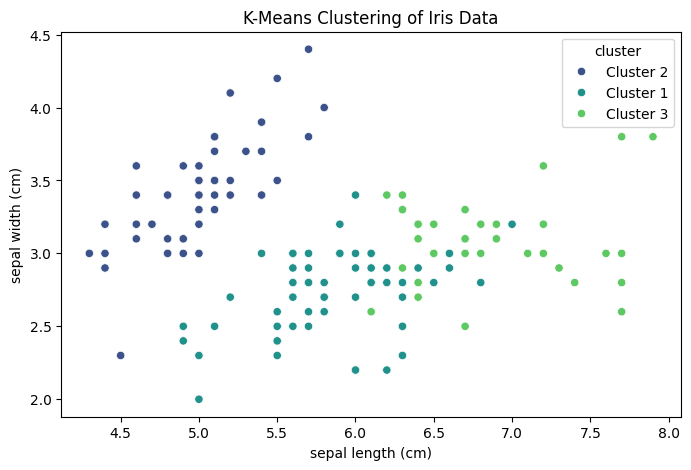

In [37]:
# Scatter plot of clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['cluster'], palette='viridis')
plt.title("K-Means Clustering of Iris Data")
plt.show()
